Our project will be to analyze the Housing Market & Prices. 

The data will be retrived from: https://www.kaggle.com/datasets/rukenmissonnier/final-house


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

The Dataset is going to be a downloaded file called: house.csv

In [2]:
#Create dataframe from csv
df = pd.read_csv("house.csv")

#Print the head of the dataframe
print("\nHEAD OF THE DATAFRAME")
print(df.head())

#Print The information about the dataframe
print("\nINFORMATION ABOUT THE DATAFRAME")
print(df.info())



HEAD OF THE DATAFRAME
   bedroom_count    net_sqm  center_distance  metro_distance  floor  age  \
0              1  26.184098          1286.68      204.003817     22   67   
1              1  34.866901          1855.25      186.980360      8   30   
2              1  36.980709           692.09      111.224999     24   24   
3              1  17.445723          1399.49      237.998760      1   66   
4              1  52.587646            84.65      100.996399     20    3   

         price  
0  96004.80456  
1  92473.72257  
2  98112.51994  
3  92118.32687  
4  98976.65318  

INFORMATION ABOUT THE DATAFRAME
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4308 non-null   int64  
 1   net_sqm          4308 non-null   float64
 2   center_distance  4308 non-null   float64
 3   metro_distance   4308 non-null   float64
 4 

Examining the Dataframe, We can see that the label is goiing to be a continous quantity. This means that we will have to use <b>Regression</b> to help predict a continuous quanitity, as opposed to classification which predicts discrete class labels.

Next, We will create the feature matrix and the label vector

In [3]:
#Create feature matrix (X)
X = df.drop('price', axis=1) # all features besides label

#Create label vector (y)
y = df['price'] #label

In [4]:
#Print X to view feature matrix
X

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age
0,1,26.184098,1286.68,204.003817,22,67
1,1,34.866901,1855.25,186.980360,8,30
2,1,36.980709,692.09,111.224999,24,24
3,1,17.445723,1399.49,237.998760,1,66
4,1,52.587646,84.65,100.996399,20,3
...,...,...,...,...,...,...
4303,9,175.166533,1299.71,217.739012,2,5
4304,6,215.352151,1346.36,77.724676,14,5
4305,5,299.563972,1585.37,235.537881,3,5
4306,1,29.193907,1896.23,147.223827,4,2


In [5]:
#Print y to view label vector
y

0        96004.80456
1        92473.72257
2        98112.51994
3        92118.32687
4        98976.65318
            ...     
4303    102707.35620
4304     99695.06499
4305     93803.71562
4306     92914.72913
4307     93743.04729
Name: price, Length: 4308, dtype: float64

We can see here that the label vector are all floats. Therfore we must use a regression algorithm.

We will start by splitting the dataset into testing and training sets.

In [6]:
#Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=9)

Since we are working with a continous label, we need to normalize the features.

In [7]:
#Normalize(Scale) the features
scaler = StandardScaler()
#Normalize the Features and not the target!!!!
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

We will now be using a linear regression model on the training set


In [8]:
#import
from sklearn.linear_model import LinearRegression

#instatiate object
my_linreg = LinearRegression()

#train on training set with normalized x_train
my_linreg.fit(X_train_normalized, y_train)

#Check the coeeficients of the linear regression model
print(my_linreg.intercept_)

# printing [Theta1, Theta2, Theta3] using attribute "coef_":
print(my_linreg.coef_)

95654.30497786804
[  663.19514902  2469.87126012 -1883.76039318   449.13956523
   936.31093355  -694.45735193]


Using the data we can conclude that the most important feature given is the (net_sqm) feature!

Next we will predict price for the testing set

In [9]:
#predict
y_prediction = my_linreg.predict(X_test_normalized)

print(y_prediction)

[ 95992.2180046   91427.61766554  95487.04144494 ...  95509.20639007
 105580.2184072   91807.49711338]


In [10]:
#import metrics
from sklearn import metrics
#compare the predicted balance with the actual balance by calculating and reporting the RMSE

#calculating MSE
mse = metrics.mean_squared_error(y_test, y_prediction)

#use numpy to find RMMSE
rmse = np.sqrt(mse)

#print out rmse
print("RMSE:",rmse)

RMSE: 2262.0322332411815


We will now use 10-fold cross-validation to evaluate the performance of a linear regression in predicting the price.

In [11]:
#import pipeline and cross core from sklearn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
clf = make_pipeline(StandardScaler(), my_linreg)
#make sure to use normalized
mse_list = cross_val_score(clf, X, y, cv=10, scoring='neg_mean_squared_error')

#make mse postitive to calc rmse
mse_list_positive = -mse_list

#use numpy to calculate rmse
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)

#caclculate the mean
print("RMSE with 10-fold Cross-Validation:",rmse_list.mean())

[1301.69414799 1305.86450344 1308.7002405  1325.13874027 1295.25423899
 1318.09791853 1445.54793491 1468.68923988 3411.30547229 4607.86606463]
RMSE with 10-fold Cross-Validation: 1878.8158501438636


In [12]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=9)
random_forest.fit(X_train_normalized, y_train)
y_prediction_rf = random_forest.predict(X_test_normalized)
print(y_prediction_rf)

[ 95397.5440231  91532.8801644  94747.0873673 ...  95938.1555211
 103556.7964355  91704.9402345]


In [13]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_prediction_rf))
print("RMSE (Random Forest Regression):", rmse_rf)

RMSE (Random Forest Regression): 2292.3345645635045


In [14]:
clf_rf = make_pipeline(StandardScaler(), random_forest)
mse_list_rf = cross_val_score(clf_rf, X, y, cv=10, scoring='neg_mean_squared_error')


#mse_list_rf = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=9),
                            #   X, y, cv=10, scoring='neg_mean_squared_error')
mse_list_positive_rf = -mse_list_rf
rmse_list_rf = np.sqrt(mse_list_positive_rf)
print("RMSE with 10-fold Cross-Validation (Random Forest):", rmse_list_rf.mean())

RMSE with 10-fold Cross-Validation (Random Forest): 2077.105250402717


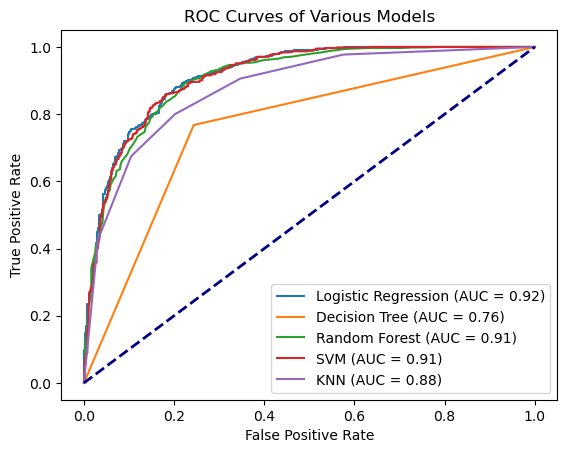

In [15]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('house.csv')

# Assuming 'price' is the target variable
X = data.drop('price', axis=1)
y = data['price']

# Convert price to a binary classification problem
y = (y > y.median()).astype(int)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the machine learning models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

# Dictionary to hold ROC AUC scores
roc_auc_scores = {}

# Train each model and calculate their ROC AUC
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict probabilities
    probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, probs)
    roc_auc_scores[name] = roc_auc

    # Calculate ROC Curve
    fpr, tpr, _ = roc_curve(y_test, probs)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Various Models')
plt.legend(loc='lower right')
plt.show()
